In [1]:
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten ,Activation ,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
train_dataset_path = "/app/train"
val_dataset_path = "/app/validation"

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dataset_path,
        target_size=(256, 256),
        color_mode='rgb',
        batch_size=32,
        shuffle=True,
        seed=None,
        class_mode="categorical")

val_generator = val_datagen.flow_from_directory(
        val_dataset_path,
        target_size=(256, 256),
        color_mode='rgb',
        batch_size=32,
        shuffle=True,
        seed=None,
        class_mode="categorical")

Found 4800 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.


In [3]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks_max_acc = myCallback()
tensorboard_callback = tf.keras.callbacks.TensorBoard("logs")

In [4]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(5,5))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2560032   
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)              

In [5]:
history = model.fit_generator(
      train_generator,
      epochs=10,
      validation_data=val_generator)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
150/150 [==============================] - 1069s 7s/step - loss: 0.3212 - accuracy: 0.8999 - val_loss: 0.3174 - val_accuracy: 0.9000
Epoch 2/10
150/150 [==============================] - 1085s 7s/step - loss: 0.3168 - accuracy: 0.8999 - val_loss: 0.3184 - val_accuracy: 0.9000
Epoch 3/10
150/150 [==============================] - 1069s 7s/step - loss: 0.3159 - accuracy: 0.9001 - val_loss: 0.3184 - val_accuracy: 0.9000
Epoch 4/10
150/150 [==============================] - 1085s 7s/step - loss: 0.3108 - accuracy: 0.8999 - val_loss: 0.3054 - val_accuracy: 0.9002
Epoch 5/10
150/150 [==============================] - 1048s 7s/step - loss: 0.3084 - accuracy: 0.9003 - val_loss: 0.2980 - val_accuracy: 0.9007
Epoch 6/10
150/150 [==============================] - 1174s 8s/step - loss: 0.3055 - accuracy: 0.9008 - val_loss: 0.2774 - val_accuracy: 0.9015
Epoch 7/10
150/150 [=====================

In [6]:
model.save('CNN_10_epochs_256_imres_Model.h5')


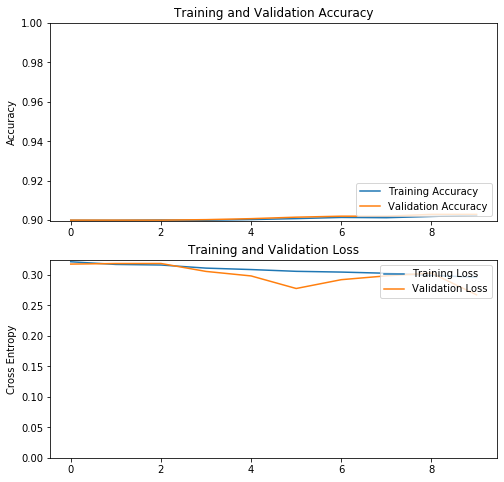

In [13]:
acc = history.history["accuracy"]
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()